In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [84]:
ls ../../

active_learning_develop/
amp_development_not_apex.ipynb
amp_development_not_apex_trans_verse.ipynb
amp_development_not_apex_trans_verse_lstm.ipynb
amp_development_not_apex_trans_verse_lstm_v2.ipynb
arg_config.py
aversarial_development/
cyclic_learning.ipynb
experiment_classification2/
experiment_classification_bidir/
experiment_classification_bidir_collect_16/
experiment_classification_bidir_collect_64/
experiment_classification_bidir_cyclic/
package/
package_f/
__pycache__/
swag_transformers_utils.py


# utils

## filter_paths

In [4]:
def filter_paths(keywords,main_path):
    
    all_paths = os.listdir(main_path)
    
    
    filterd = []
    
    for i in  all_paths:
        
        all_found = 0
        
        for k in keywords:
            
            if k in i:
                
                all_found += 1
                
        if all_found == len(keywords):
            
            filterd.append(os.path.join(main_path,i))
                
            
    return filterd



    

## get_name

In [5]:
def get_name(path):
    
    if 'cola' in path:
        
        data_name = 'cola'
        
    elif 'ag_news' in path:
        
        data_name = 'ag_news'
        
    elif 'polarity' in path:
        
        data_name = 'polarity'
        
    elif 'subjectivity' in path:
        
        data_name = 'subjectivity'
        
    else:
        raise NotImplementedError
        
        
    if 'no_clust' in path:
        
        clust_type = 'no_clust'
        
        
    elif 'normal_clust' in path:
        
        clust_type = 'normal_clust'
        
    elif 'high_clust' in path:
        
        clust_type = 'high_clust_100'
        
    else:
        raise NotImplementedError
        
    if 'random' in path:
        
        aq_type = 'random'
        
        
    elif 'bald' in path:
        
        aq_type = 'bald'
        
    elif 'var_ratios' in path:
        
        aq_type = 'var_ratios'
        
    else:
        raise NotImplementedError
        
        
    
    return data_name + '_' + clust_type + '_' + aq_type
        
   

## make_cluster_plots

In [6]:
def make_cluster_plots(main_dir,
                       keywords,
                       metr_s
                      ):
    
    
    # filter paths
    all_cola_paths  = filter_paths(keywords,main_dir)
    
    # get names
    names = [get_name(i) for i in all_cola_paths]
    
    # strategies
    strategy = []
    for i in names:
        if 'bald' in i:
            strategy.append('bald')
        elif 'random' in i:
            strategy.append('random')
        elif 'var_ratios' in i:
            strategy.append('var_ratios')
        else:
            raise NotImplementedError
    
    
    data_show_all = {}

    for i,j in zip(all_cola_paths,names):

        with open(i) as json_file:
            data = json.load(json_file)
            data_show_all[j] = data


    for i,j in zip(data_show_all,strategy):

        data_c = data_show_all[i]

        try:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
        except:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

    plt.legend()
    plt.ylabel(metr_s)
    plt.xlabel('n train data points')
    # plt.title('aquistion strategy: bald')
    plt.show()

    
    
    

# implement

## ag_news

In [50]:
ls final_publish_paper_experiments

ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_high_clust.json
ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_no_clust.json
ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_normal_clust.json
ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_high_clust.json
ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_no_clust.json
ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_normal_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_high_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_no_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_normal_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_high_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_no_clust.json
cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_it

In [51]:
main_dir = './final_publish_paper_experiments/'

keywords = ['ag_news', 'clust']


### f1

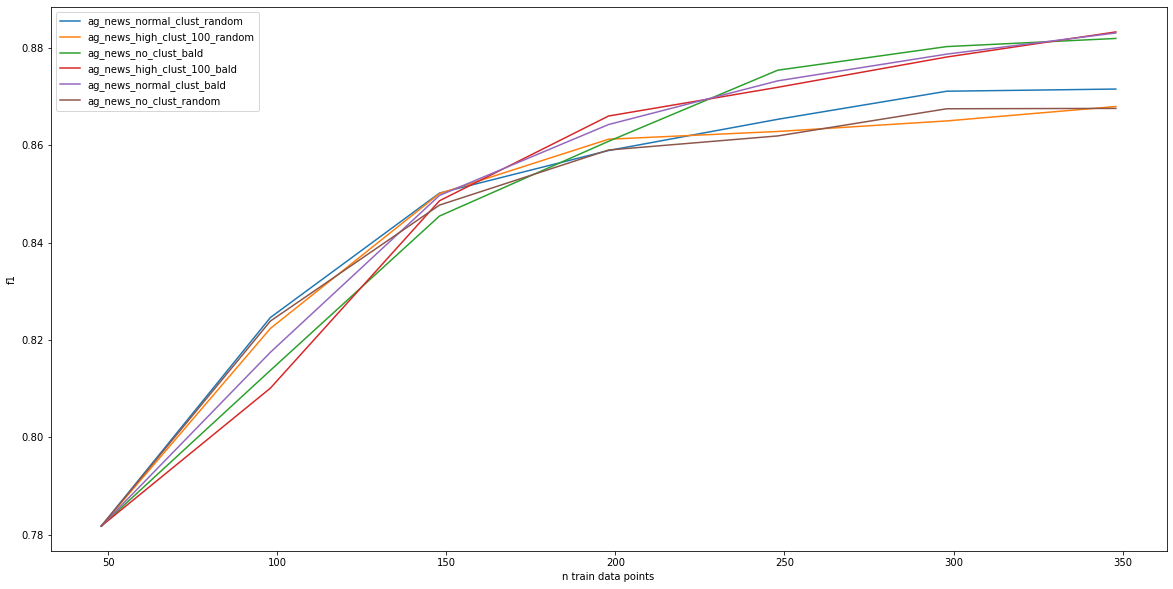

In [52]:
make_cluster_plots(main_dir,
                    keywords,
                       'f1'
                      )

In [66]:

# make_cluster_plots(main_dir,
#                     keywords,
#                        'acc'
#                       )

In [67]:

# make_cluster_plots(main_dir,
#                     keywords,
#                        'b_acc'
#                       )

## cola

In [76]:
main_dir = './final_publish_paper_experiments/'

keywords = ['cola', 'clust']

### f1

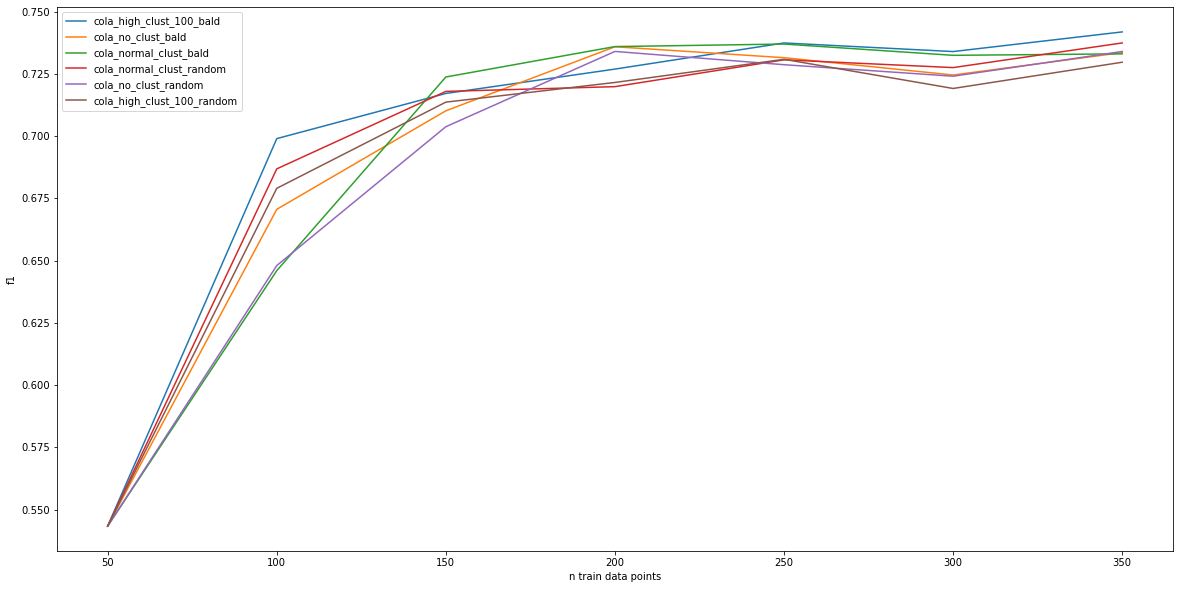

In [69]:
make_cluster_plots(main_dir,
                    keywords,
                       'f1'
                      )

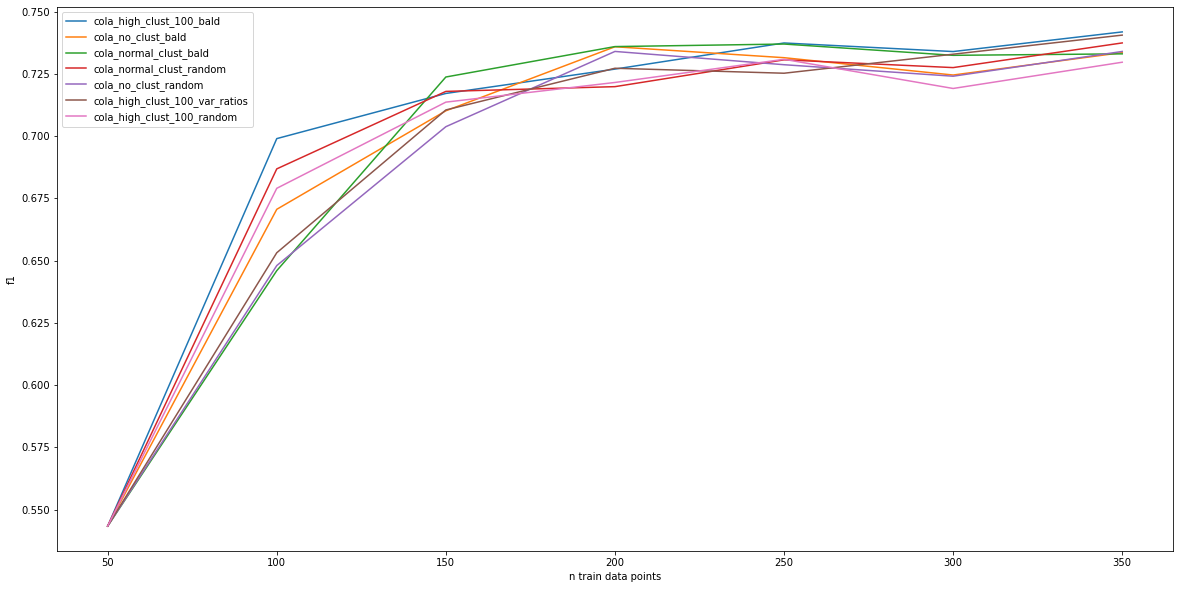

In [81]:
# make_cluster_plots(main_dir,
#                     keywords,
#                        'f1'
#                       )

## polarity


In [72]:
main_dir = './final_publish_paper_experiments/'

keywords = ['polarity', 'clust']

### f1

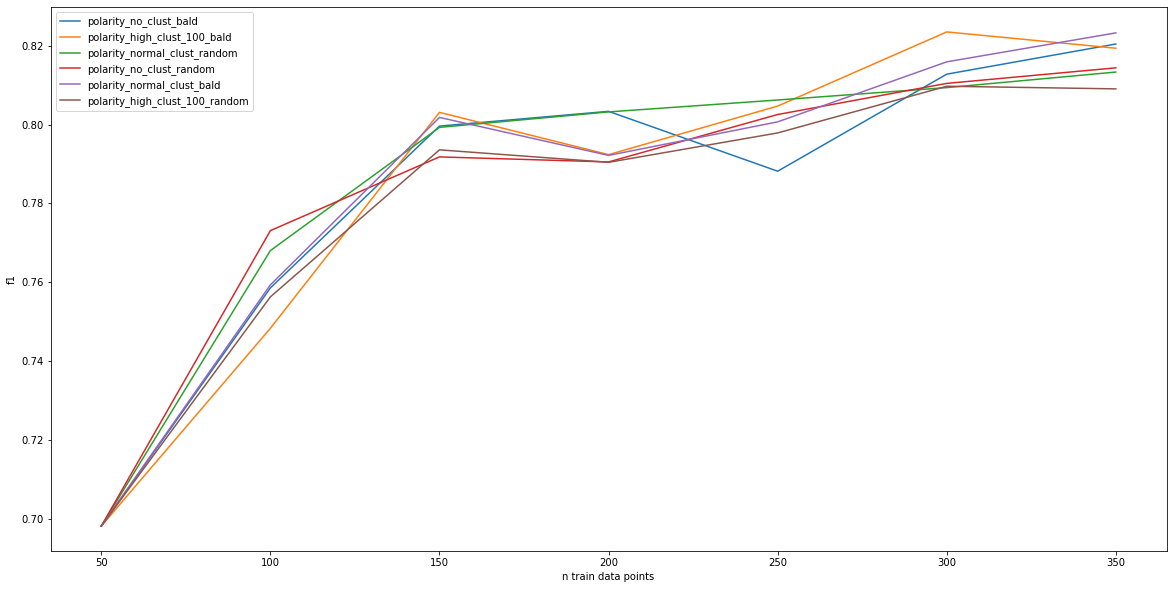

In [73]:
make_cluster_plots(main_dir,
                    keywords,
                       'f1'
                      )

## subjectivity


In [74]:
main_dir = './final_publish_paper_experiments/'

keywords = ['subjectivity', 'clust']

### f1

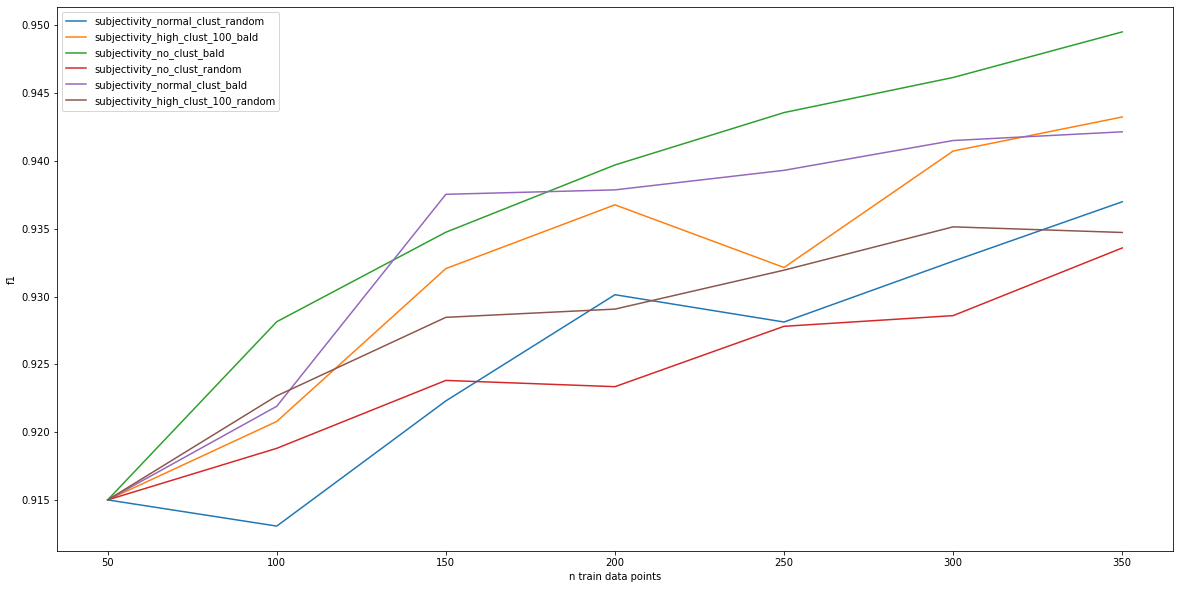

In [75]:
make_cluster_plots(main_dir,
                    keywords,
                       'f1'
                      )

# make al plost

In [526]:
def get_name_al(path):
    
    
    # sampling method
    
    if 'mc' in path:
        
        sampling_method = 'mc'
        
    elif 'swag_sampling_plus_MC' in path:
        
        sampling_method = 'swag_sampling_plus_MC'
        
        
    elif 'swag_sampling_lowrank' in path:
        
        sampling_method = 'swag_sampling_lowrank'
        
        
    elif 'swag_sampling_plus_lowrank_MC' in path:
        
        sampling_method = 'swag_sampling_plus_lowrank_MC'
        
    
        
    elif 'swag_sampling' in path:
        
        sampling_method = 'swag_sampling'
        
    else:
        raise NotImplementedError
        
        
    # model type
        
        
    if 'norm' in path:
        
        model_type = 'norm'
        
        
    elif 'swca' in path:
        
        model_type = 'swca'
        
    else:
        raise NotImplementedError
        
    # aquisition function type
        
    if 'random' in path:
        
        aq_type = 'random'
        
        
    elif 'bald' in path:
        
        aq_type = 'bald'
        
    elif 'var_ratios' in path:
        
        aq_type = 'var_ratios'
        
    else:
        raise NotImplementedError
        
        
    if 'its_28' in path:
        
        seed_type = 'its_28'
        
    elif 'its_16' in path:
        
        seed_type = 'its_16'
        
        
    elif 'its_29' in path:
        
         seed_type = 'its_29'
            
    elif 'its_30' in path:
        
         seed_type = 'its_30'
            
    elif 'its_31' in path:
        
         seed_type = 'its_31'

    else:
        
        seed_type = ''
    
        
        
    
    return model_type + '_' + aq_type + '_' + sampling_method + '_' + seed_type
        

def filter_paths_based_on_aq(aq_type=None,path_list=None):
    
    if isinstance(aq_type,list):
        
        for i in aq_type:
            
            assert i in ['random','bald','var_ratios']
         
        paths_return = []
        
        for j in aq_type:
            
            for k in path_list:
                
                if j in k:
                    
                    paths_return.append(k)
                    
        return paths_return
            
    else:
        assert aq_type in ['random','bald','var_ratios']
    
        return [i for i in path_list if aq_type in i]


def filter_paths_based_on_sampling_method(sampling_type=None,path_list=None):
    
    assert sampling_type in ['mc','swag_sampling']
    
    return [i for i in path_list if sampling_type in i]

def filter_paths_based_on_model_type(m_type=None,path_list=None):
    
    assert m_type in ['swca','norm']
    
    return [i for i in path_list if m_type in i]


def filter_paths_based_on_clustering_method(clustering_type=None,path_list=None):
    
    assert clustering_type in ['no_clust','normal_clust','high_clust']
    
    return [i for i in path_list if clustering_type in i]


def filter_paths_based_on_its(num_its=None,path_list=None):
    
    assert num_its in ['its_35','its_13','its_83','its_77','its_28','its_16','its_29','its_30','its_31']
    
    return [i for i in path_list if num_its in i]


def filter_paths_based_on_nq(num_its=None,path_list=None):
    
    assert num_its in ['nq_10','nq_50']
    
    return [i for i in path_list if num_its in i]



In [442]:
metr_s = 'f1'

In [443]:
ls ../final_code

active_learning.py
al_params.py
aquisition.py
arg_config.py
available_datasets/
bert_classifier_model.py
bert_modeling_custom.py
bert_trainer_utils.py
clustering.py
contrastive_learning.py
data_handler.py
evaluation_utils.py
experiment_run_classification/
final_publish_paper_al_experiments_ag_news/
final_publish_paper_al_experiments_cola/
final_publish_paper_al_experiments_polarity/
final_publish_paper_al_experiments_pubmed/
final_publish_paper_al_experiments_subjectivity/
kag/
make_plots.ipynb
__pycache__/
readme_run.txt
README.txt
run_al.py
run_asp.py
run_compare_clust.py
run_compare_notebook.ipynb
run_final_experiments_ag_news.sh
run_final_experiments_cola.sh
run_final_experiments_polarity.sh
run_final_experiments_pubmbed.sh
run_final_experiments_subjectivity.sh
swag_modeling.py


In [533]:
main_dir = './final_publish_paper_experiments/'
# main_dir = './final_publish_paper_experiments_v2/'
# main_dir = '../final_code/final_publish_paper_al_experiments_cola/'
# main_dir = '../final_code/final_publish_paper_al_experiments_subjectivity/'
# main_dir = '../final_code/final_publish_paper_al_experiments_polarity/'
# main_dir = '../final_code/final_publish_paper_al_experiments_ag_news/'
main_dir = '../final_code/final_publish_paper_al_experiments_pubmed/'

# keywords = ['ag_news', 'clust']
# keywords = ['cola', 'clust']
# keywords = ['subjectivity', 'clust']
# keywords = ['polarity', 'clust']
keywords = ['pubmed', 'clust']

In [534]:
all_cola_paths  = filter_paths(keywords,main_dir)
all_cola_paths

['../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_norm_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_16_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_ps

In [535]:
len(all_cola_paths)

11

In [222]:
all_cola_paths = filter_paths_based_on_sampling_method('swag_sampling',all_cola_paths)

In [223]:
all_cola_paths  = filter_paths_based_on_model_type('swca',all_cola_paths)

In [224]:
len(all_cola_paths)

3

In [194]:
# all_cola_paths = filter_paths_based_on_clustering_method('high_clust',all_cola_paths)

In [496]:
all_cola_paths = filter_paths_based_on_aq('bald',all_cola_paths)

len(all_cola_paths)

9

In [14]:
all_cola_paths = filter_paths_based_on_nq('nq_10',all_cola_paths)

In [529]:
all_cola_paths

['../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_norm_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_16_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_ps

In [530]:
len(all_cola_paths)

9

In [182]:
# np.unique(all_cola_paths)

array(['../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_norm_bald_mc_high_clust.json',
       '../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_norm_random_mc_high_clust.json',
       '../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_swca_bald_mc_high_clust.json',
       '../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_swca_bald_swag_sampling_high_clust.json',
       '../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_swca_random_mc_high_clust.json',
       '../final_code/final_publish_paper_al_experiments_cola/cola_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_05_its_16_swca_random_swag_sampling_high_clust.json'],
      dtype='<U149')

In [620]:
# all_cola_paths = filter_paths_based_on_sampling_method('mc',all_cola_paths)

In [621]:
# all_cola_paths = filter_paths_based_on_sampling_method('mc',all_cola_paths)

In [536]:
all_cola_paths = filter_paths_based_on_its('its_30',all_cola_paths)

In [537]:
len(all_cola_paths)

2

In [516]:
all_cola_paths

['../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_norm_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_mc_high_clust.json']

In [538]:
# get names
names = [get_name_al(i) for i in all_cola_paths]
# names = [get_name(i) for i in all_cola_paths]

In [539]:
# names[2] = 'swca_bald_swag_sampling_its_30_b'

In [540]:
names

['swca_bald_mc_its_30', 'norm_bald_mc_its_30']

In [522]:
names = ['swca_bald_swag_sampling',
 'norm_bald_mc',
 'swca_bald_mc',
 'swca_bald_swag_sampling2']

In [523]:
data_show_all.keys()

dict_keys(['swca_bald_swag_sampling', 'norm_bald_mc', 'swca_bald_swag_sampling2'])

In [ ]:
top_performances = {'ag_news': 0.9212030699758819,
 'cola': 0.8088000431184998,
 'subjectivity': 0.9700009008107298,
 'polarity': 0.886988753263728,
    "pubmed": 0.8232711600822911
                   }

## polarity

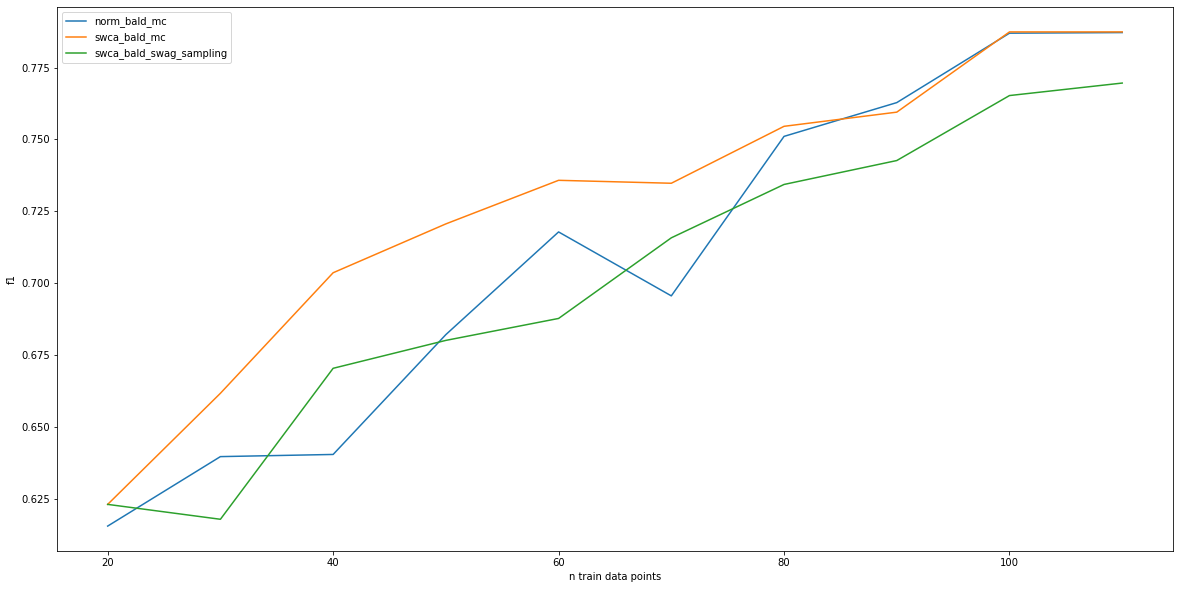

In [652]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

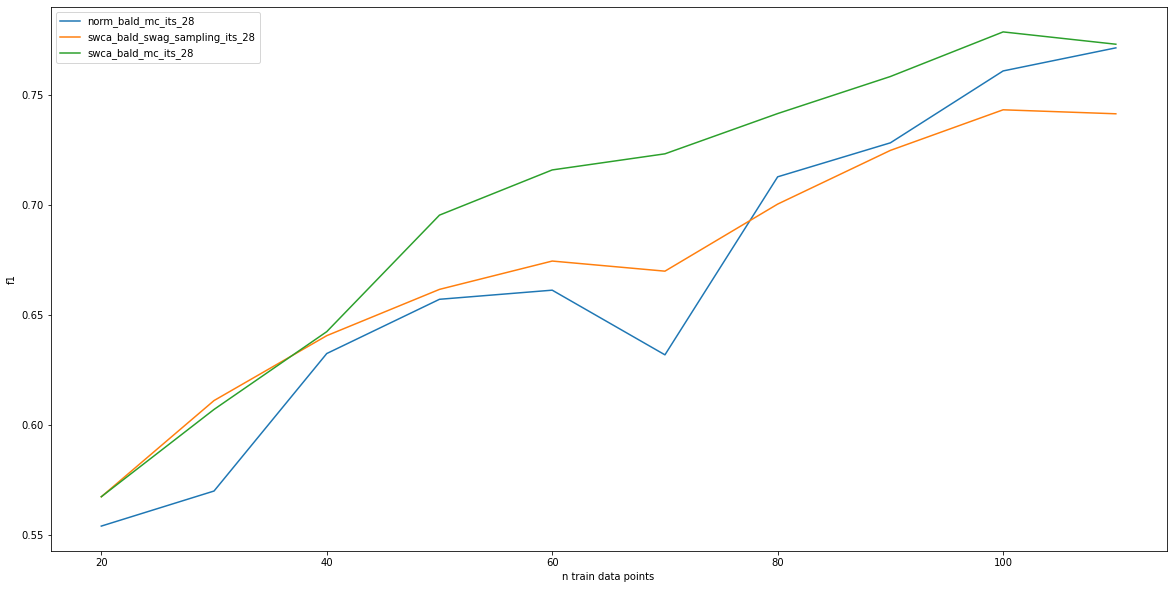

In [253]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

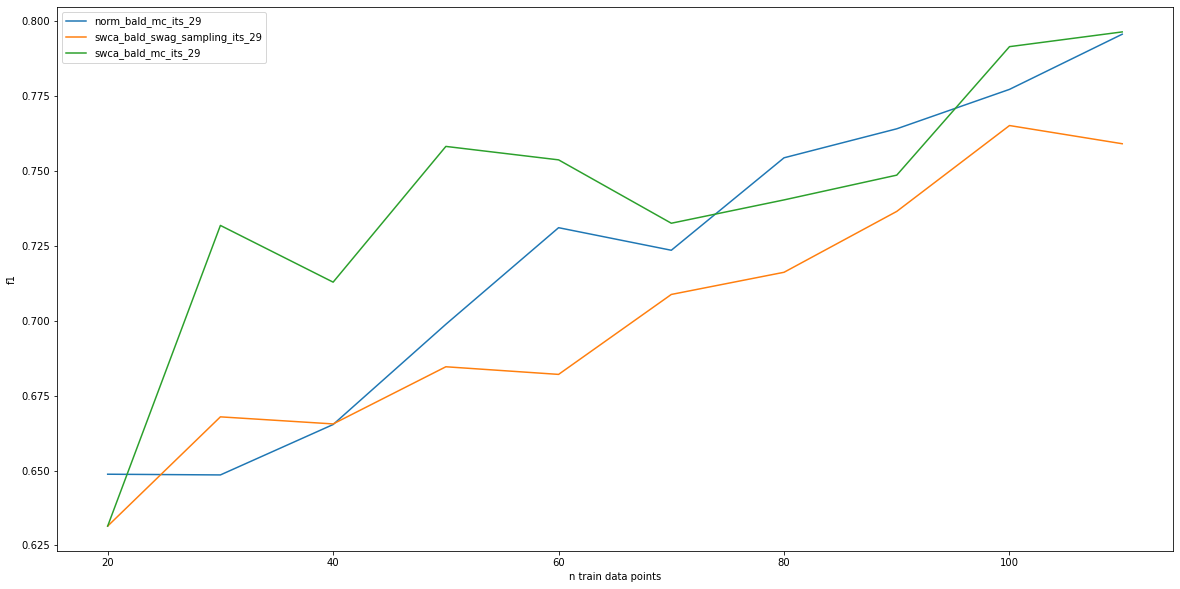

In [261]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

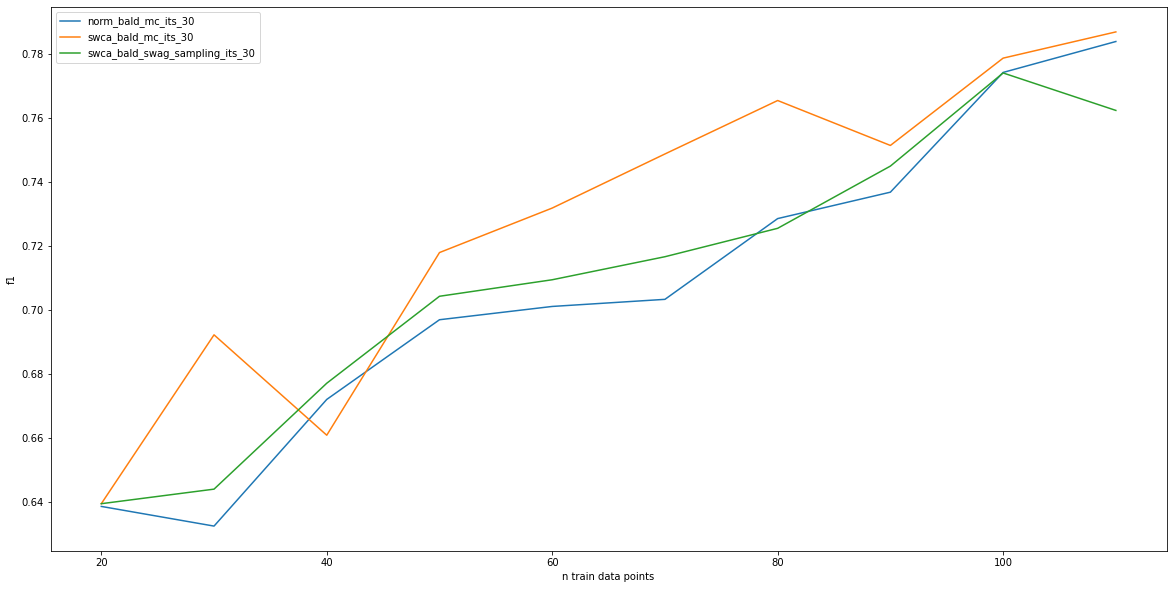

In [269]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

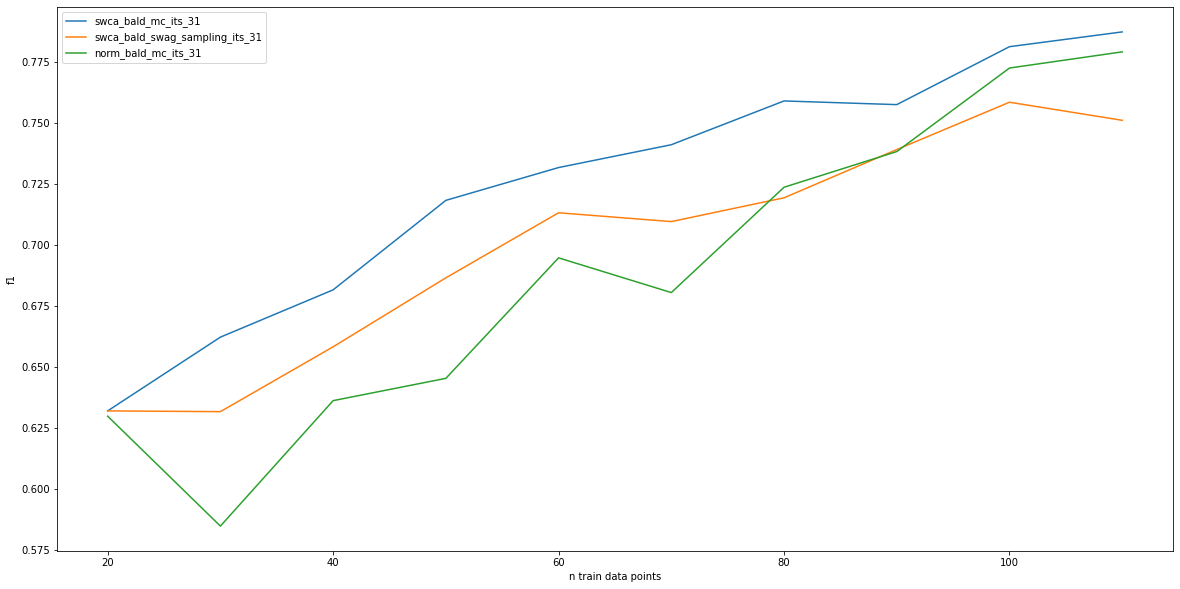

In [278]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

## ag news

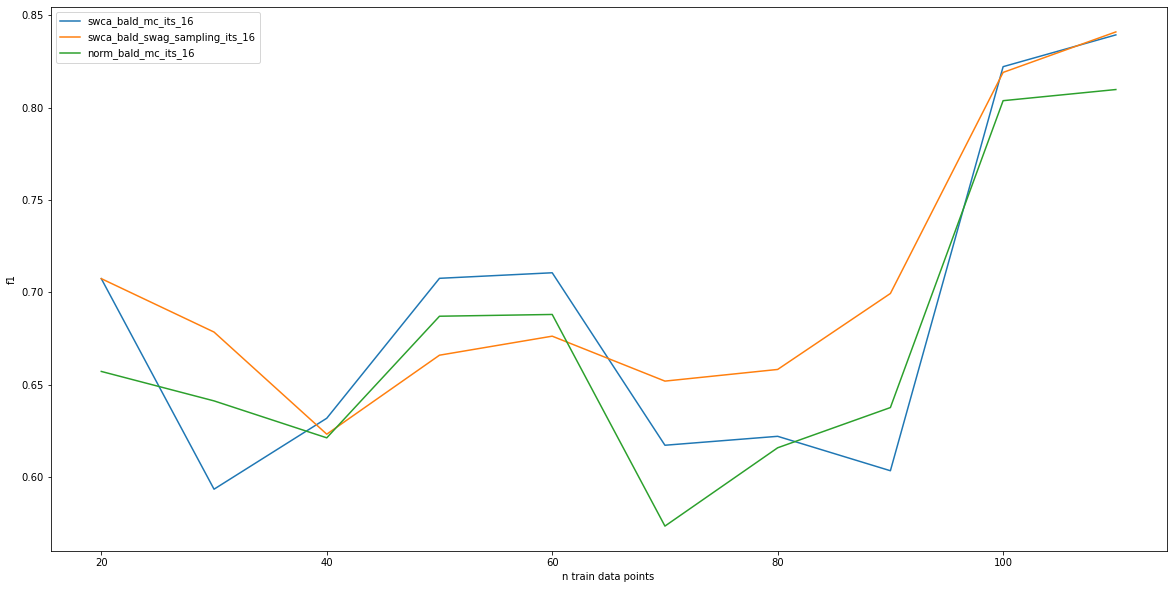

In [150]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

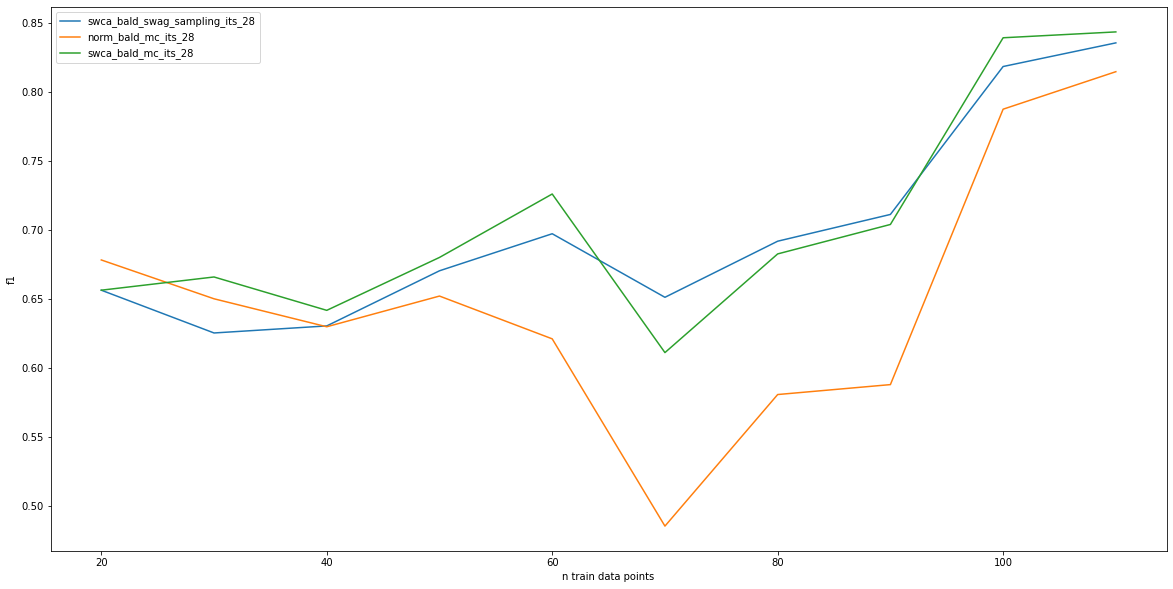

In [47]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

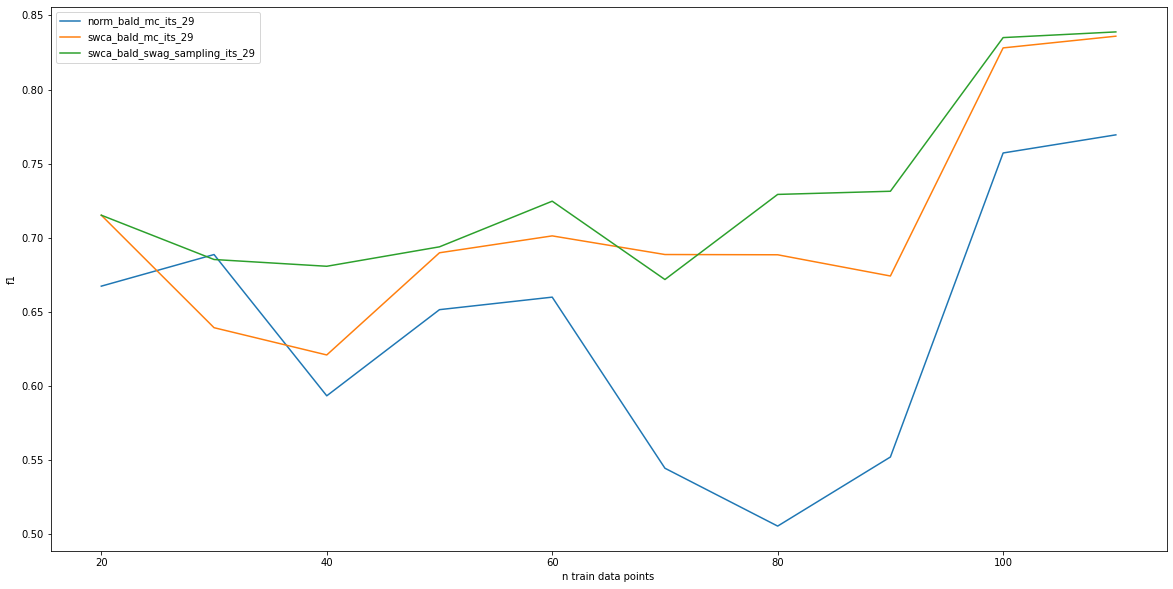

In [62]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

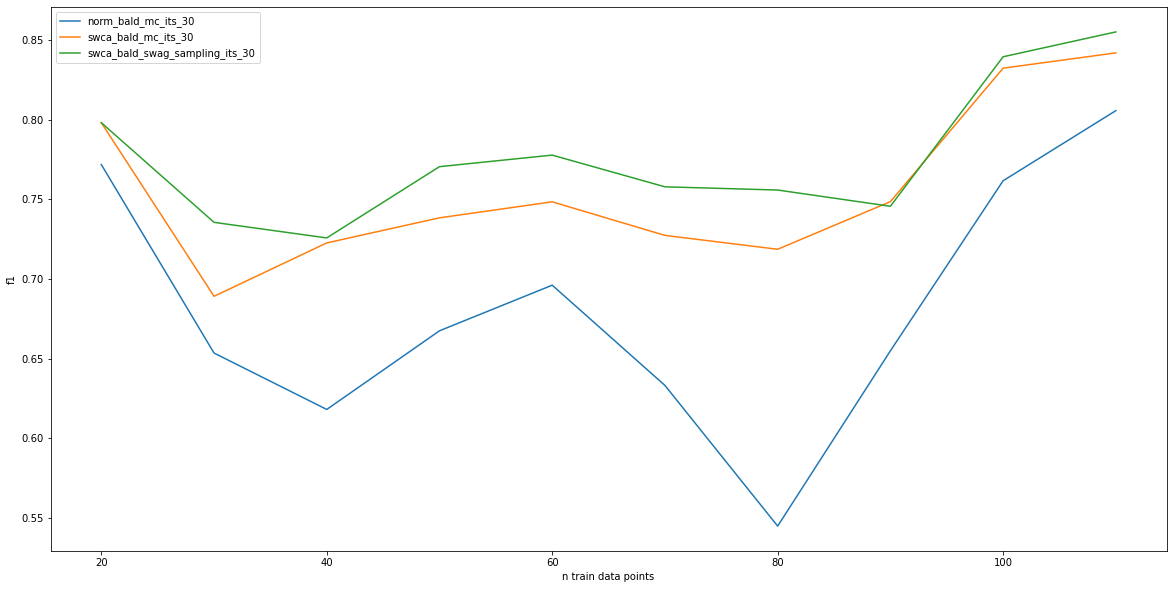

In [76]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

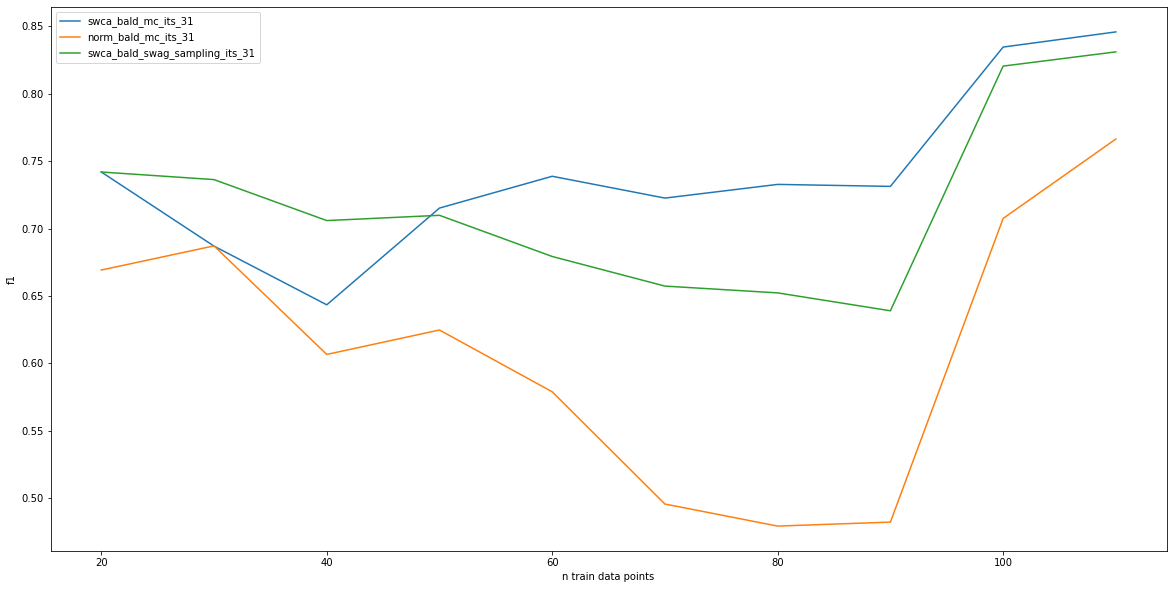

In [125]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

## cola

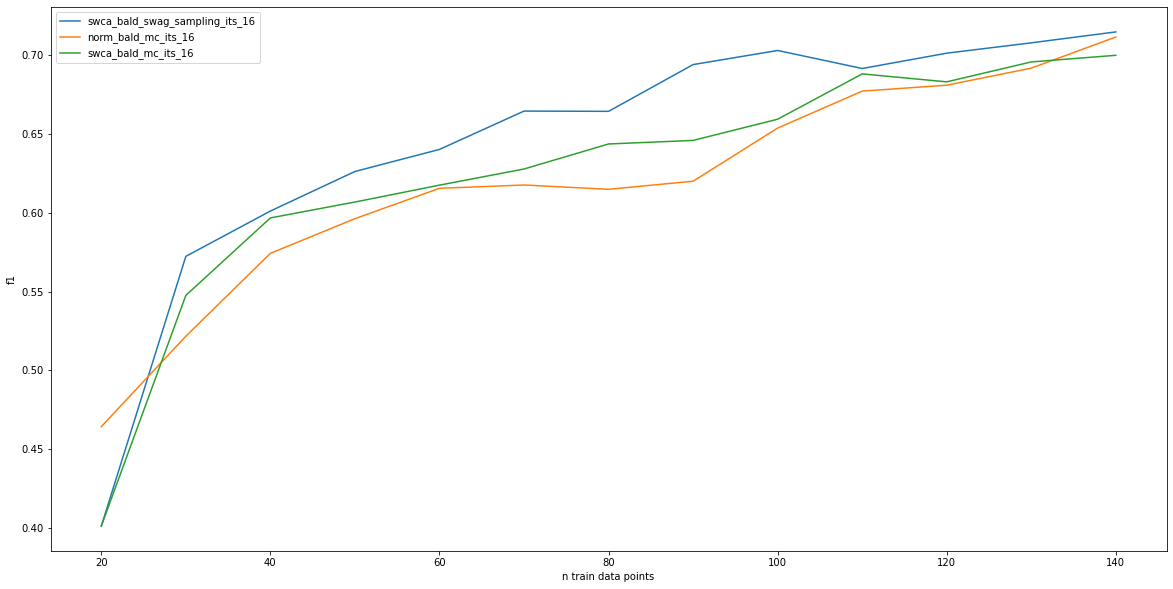

In [322]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

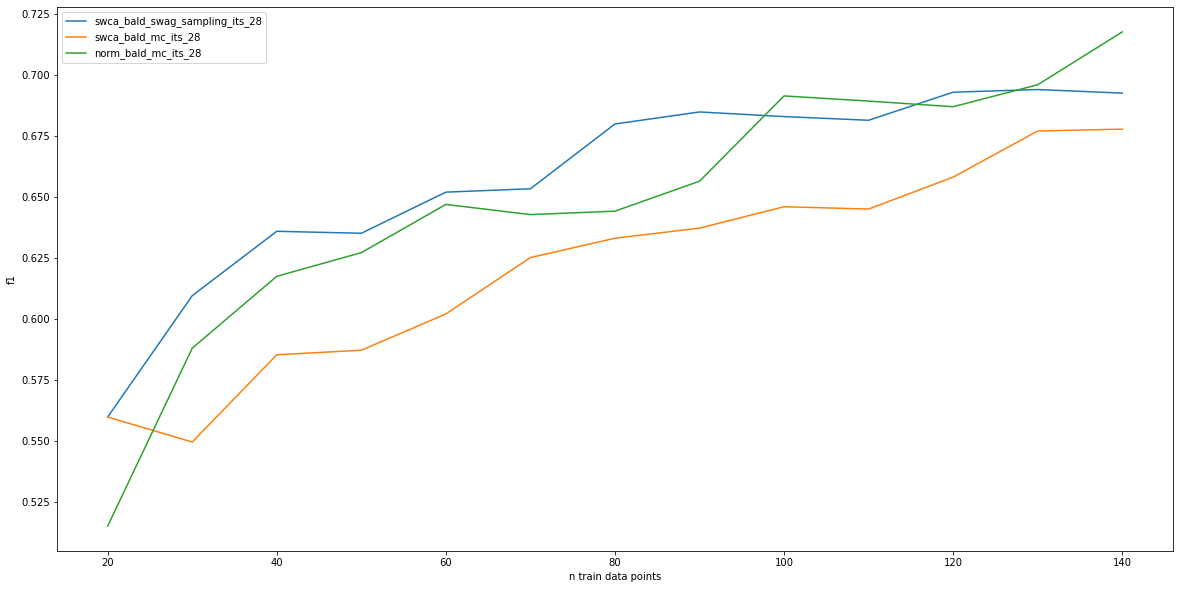

In [310]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

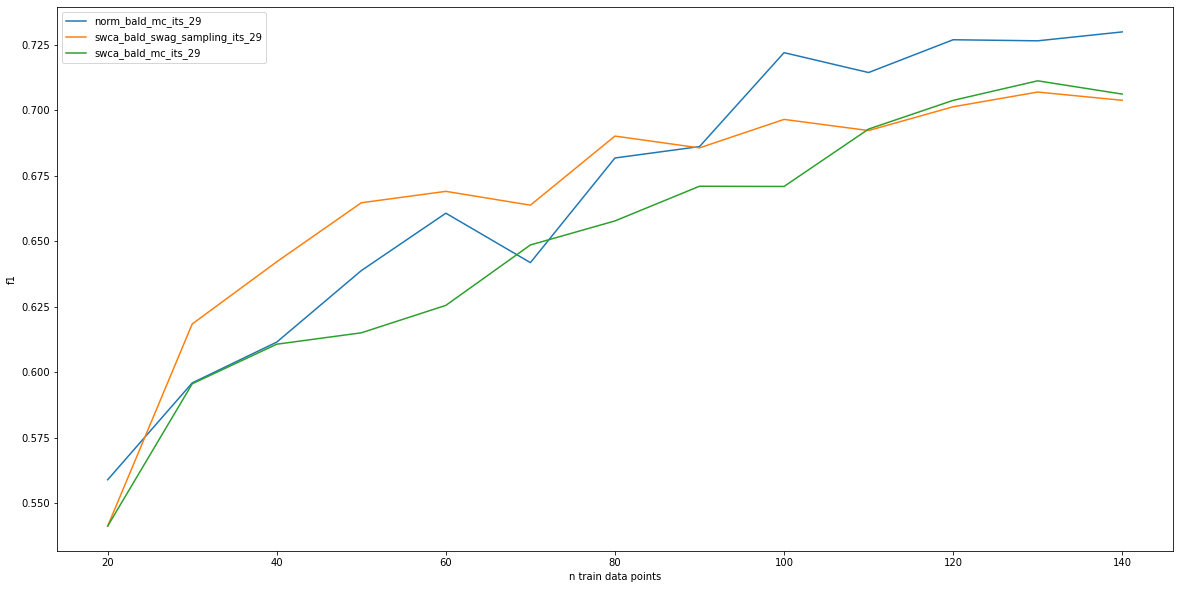

In [339]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

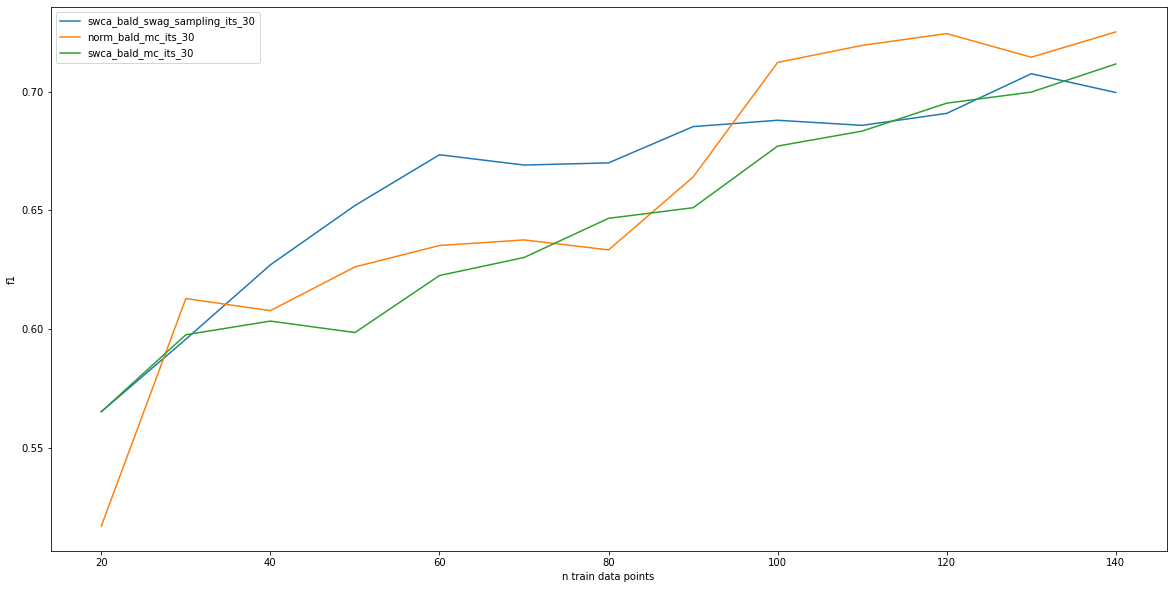

In [349]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

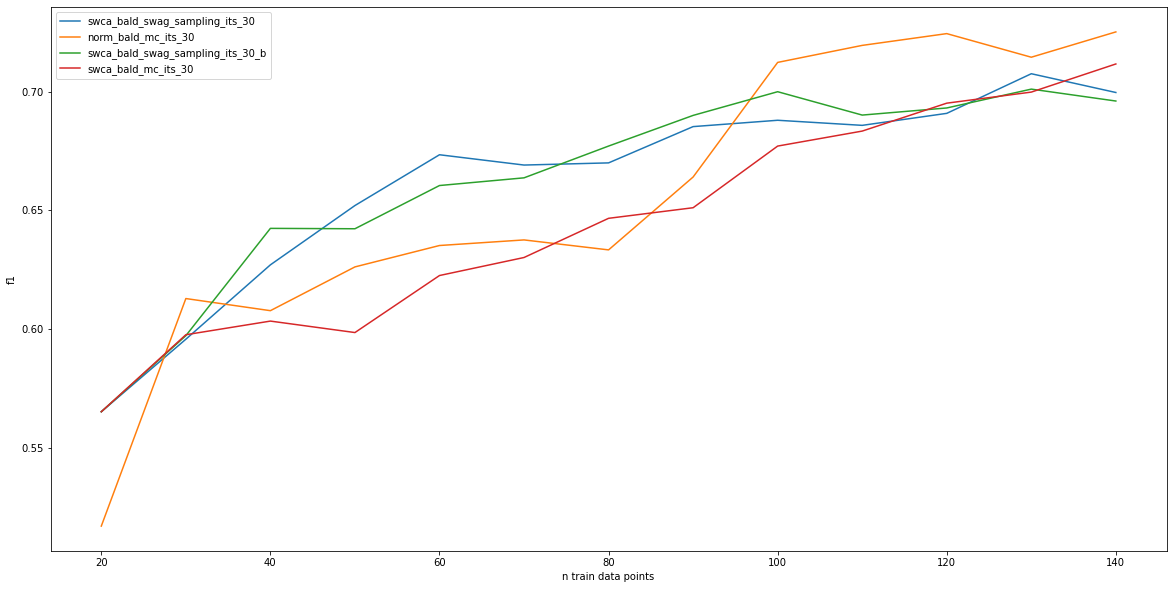

In [359]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

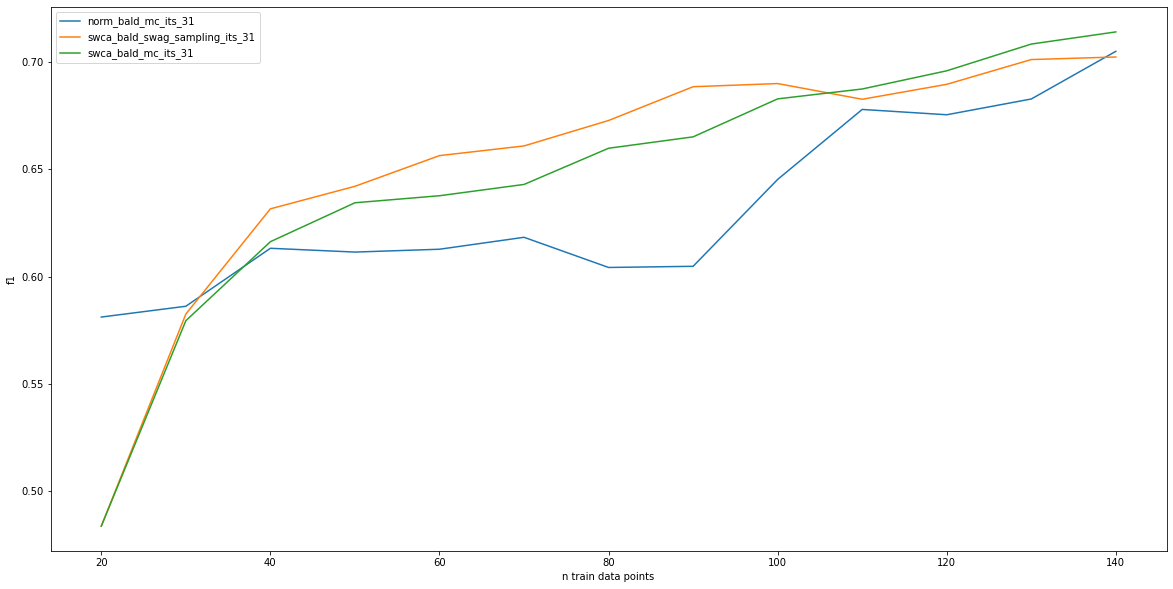

In [368]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

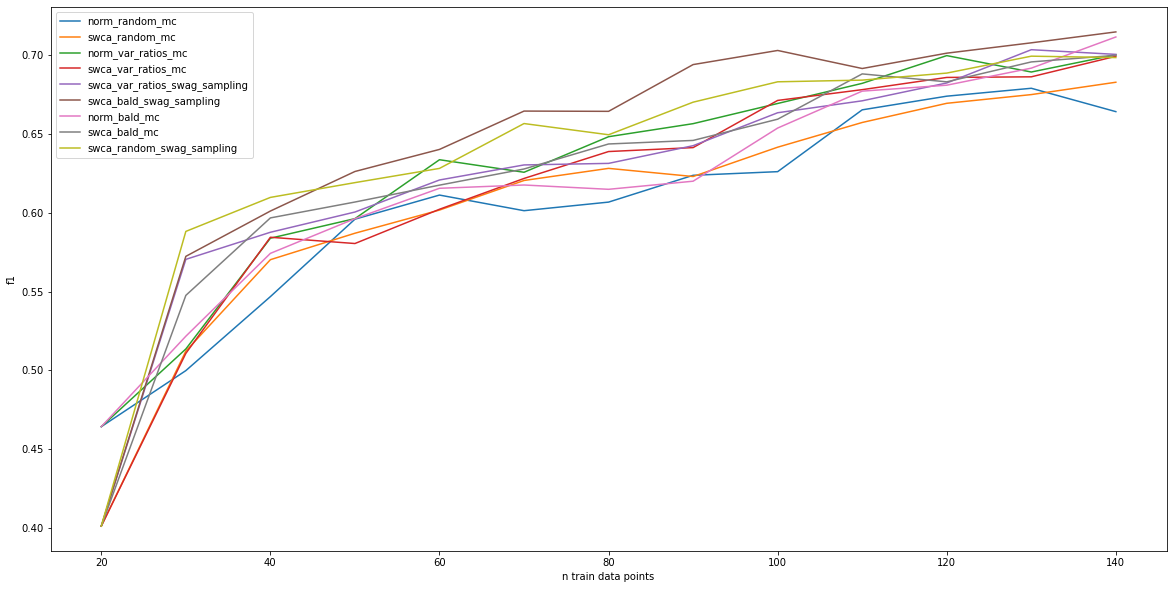

In [683]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 50:
            
            plt.plot(data_c[j]['n_train'][:50],data_c[j][metr_s][:50],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

In [685]:
72/80.8

0.8910891089108911

## subjectivity

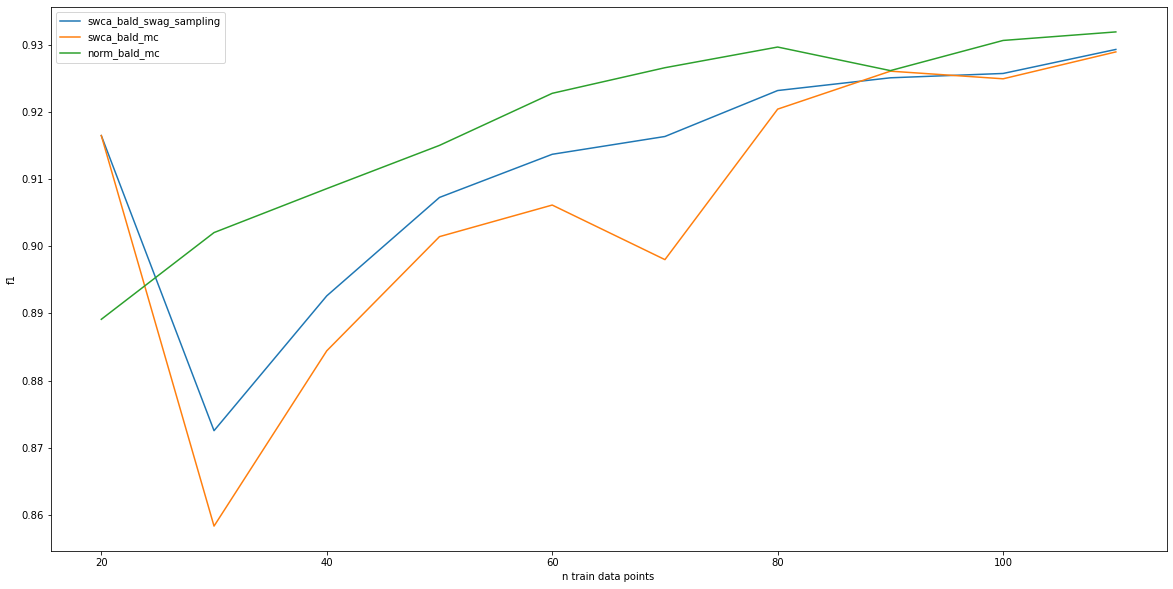

In [668]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

In [684]:
92/97

0.9484536082474226

## pubmed

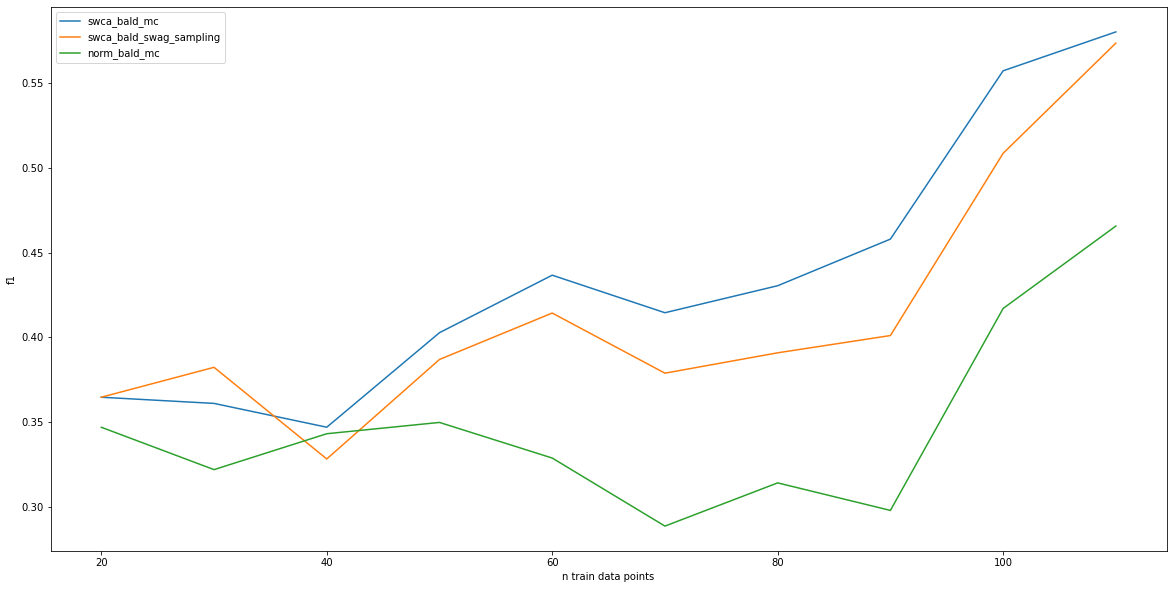

In [673]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

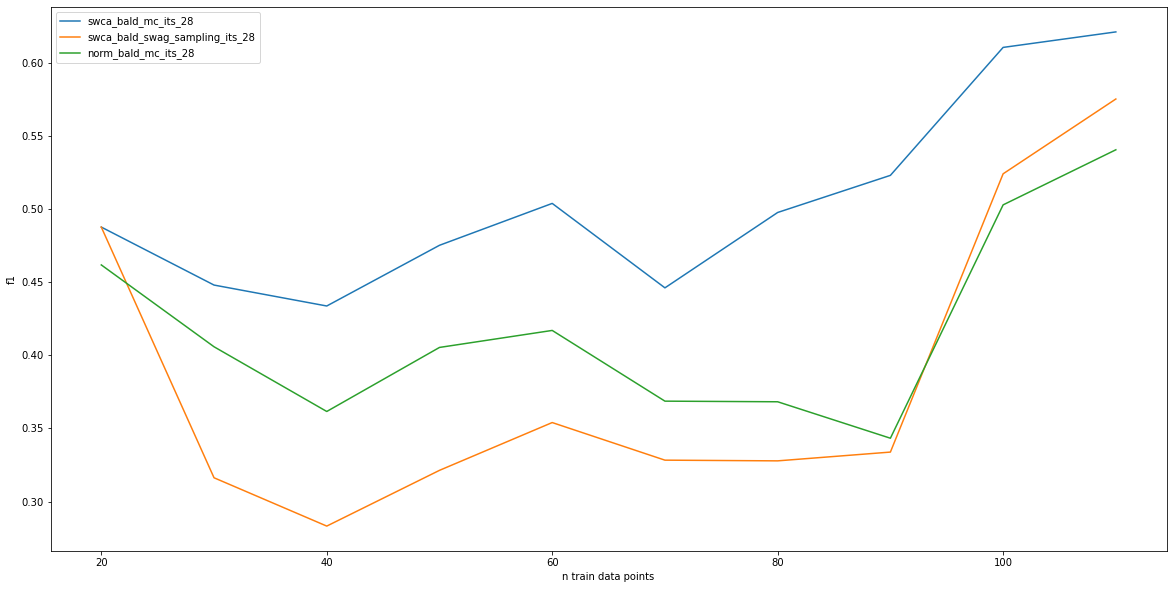

In [397]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

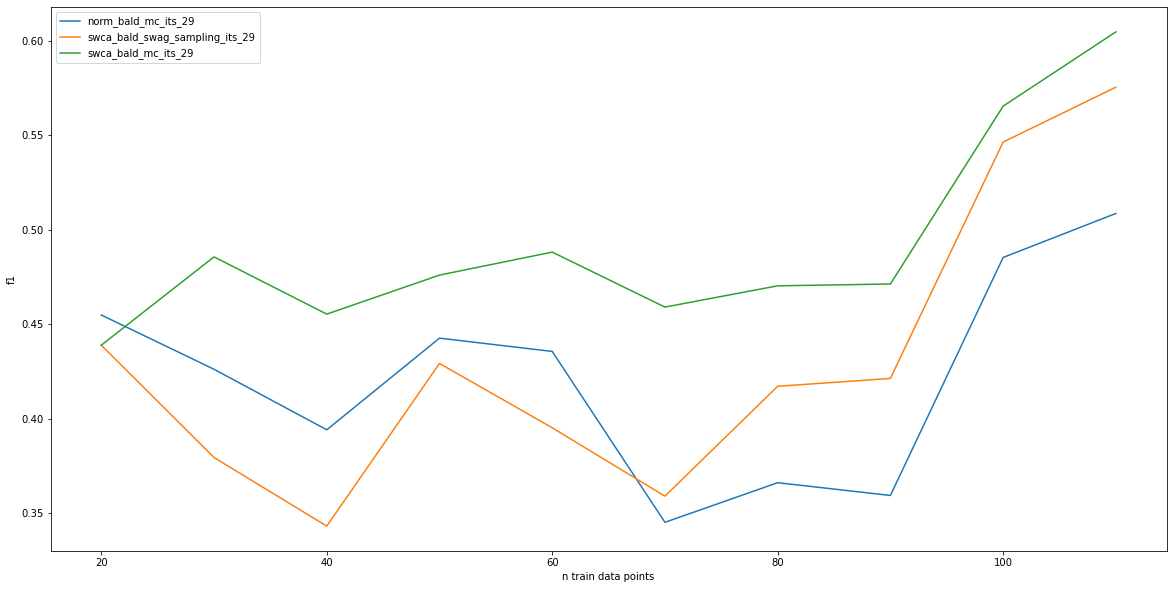

In [520]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
#         print(len(data_c[j]['n_train']))
        if len(data_c[j]['n_train']) > 10:
            
            plt.plot(data_c[j]['n_train'][:10],data_c[j][metr_s][:10],label=i)
        else:
            plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

In [686]:
56/82

0.6829268292682927

# average plots

In [501]:
all_cola_paths

['../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_norm_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_28_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_swag_sampling_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_16_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_pss_015_its_29_swca_bald_mc_high_clust.json',
 '../final_code/final_publish_paper_al_experiments_pubmed/pubmed_ts_10_e_20_taq_50_nq_10_init_ts_20_ps

In [502]:
names = [get_name_al(i) for i in all_cola_paths]

In [503]:
names

['norm_bald_mc_its_29',
 'swca_bald_mc_its_28',
 'swca_bald_swag_sampling_its_28',
 'swca_bald_swag_sampling_its_29',
 'swca_bald_mc_its_16',
 'swca_bald_mc_its_29',
 'swca_bald_swag_sampling_its_16',
 'norm_bald_mc_its_28',
 'norm_bald_mc_its_16']

In [504]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

In [505]:
data_show_all.keys()

dict_keys(['norm_bald_mc_its_29', 'swca_bald_mc_its_28', 'swca_bald_swag_sampling_its_28', 'swca_bald_swag_sampling_its_29', 'swca_bald_mc_its_16', 'swca_bald_mc_its_29', 'swca_bald_swag_sampling_its_16', 'norm_bald_mc_its_28', 'norm_bald_mc_its_16'])

In [506]:
# data_show_all['norm_bald_mc_its_29']

In [507]:
norm_bald_mc_data = [i for i in data_show_all if 'norm_bald_mc' in i]
swca_bald_swag_sampling_data = [i for i in data_show_all if 'swca_bald_swag_sampling' in i]
swca_bald_mc_data = [i for i in data_show_all if 'swca_bald_mc' in i]

In [508]:
# swca_bald_swag_sampling_data

In [509]:
af_ = 'bald'
metrr = 'f1'

data_show_all[norm_bald_mc_data[0]][af_][metrr]

[0.45485096161002125,
 0.42612601840775266,
 0.3941018256520244,
 0.44259171252726687,
 0.43558301741530725,
 0.34513875512057907,
 0.36610451064935357,
 0.3593489549045315,
 0.4852876342047371,
 0.5085825634684904,
 0.4895675449800018,
 0.4339933173657082,
 0.46423867306546496]

In [490]:
# def average_results

In [510]:
to_average = ['norm_bald_mc','swca_bald_swag_sampling','swca_bald_mc']

averaged_plots = {}

for typ_av in to_average:
    
    
    temp_data = [i for i in data_show_all if typ_av in i]
    
    
    to_average_m = np.zeros((len(temp_data),len(data_show_all[temp_data[0]][af_][metrr])))

    for j in range(len(temp_data)):

        to_average_m[j][:] = data_show_all[temp_data[j]][af_][metrr]
    
    
    
    averaged_plots[typ_av] = to_average_m.mean(axis=0).tolist()
    
averaged_plots['steps'] = data_show_all['swca_bald_mc_its_28'][af_]['n_train']

In [475]:
averaged_plots['steps'][:9]

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [476]:
len(averaged_plots['steps'])

13

## cola

In [ ]:
show = 9

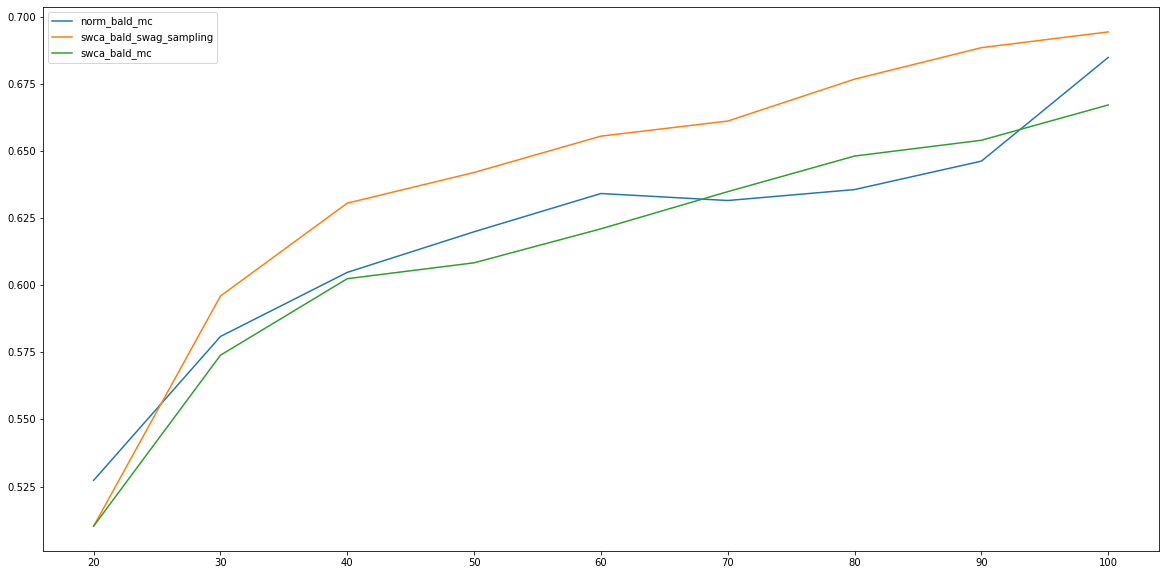

In [440]:
for k in averaged_plots:
    
    if k != 'steps':
    
        plt.plot(averaged_plots['steps'][:9],averaged_plots[k][:9],label=k)
        
plt.legend()

## ag news

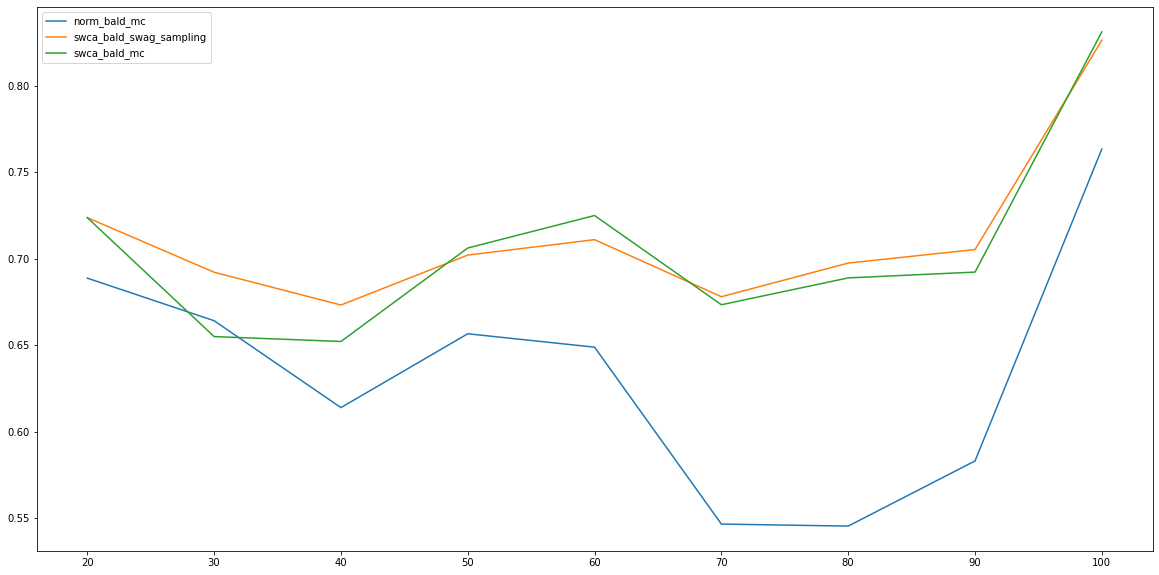

In [460]:
for k in averaged_plots:
    
    if k != 'steps':
    
        plt.plot(averaged_plots['steps'][:9],averaged_plots[k][:9],label=k)
        
plt.legend()

## polarity

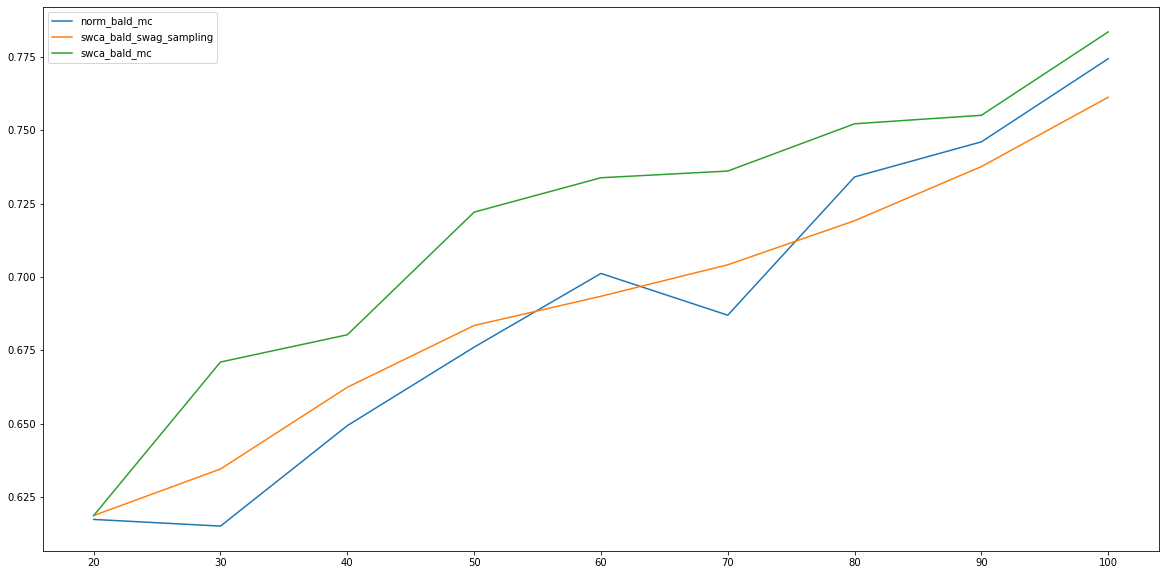

In [477]:
for k in averaged_plots:
    
    if k != 'steps':
    
        plt.plot(averaged_plots['steps'][:9],averaged_plots[k][:9],label=k)
        
plt.legend()

## pubmed

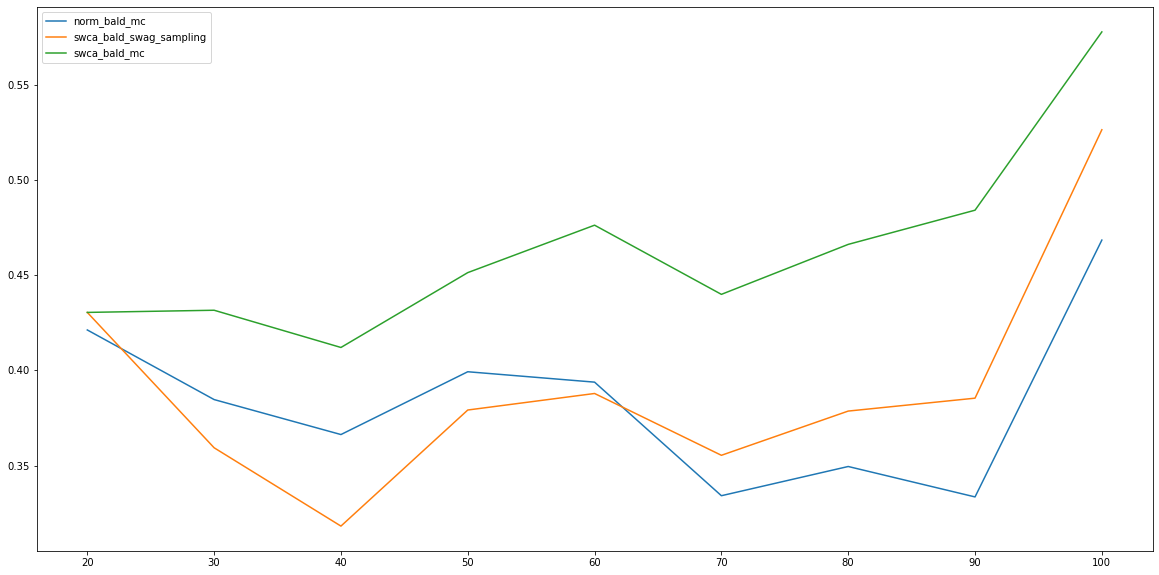

In [511]:
for k in averaged_plots:
    
    if k != 'steps':
    
        plt.plot(averaged_plots['steps'][:9],averaged_plots[k][:9],label=k)
        
plt.legend()

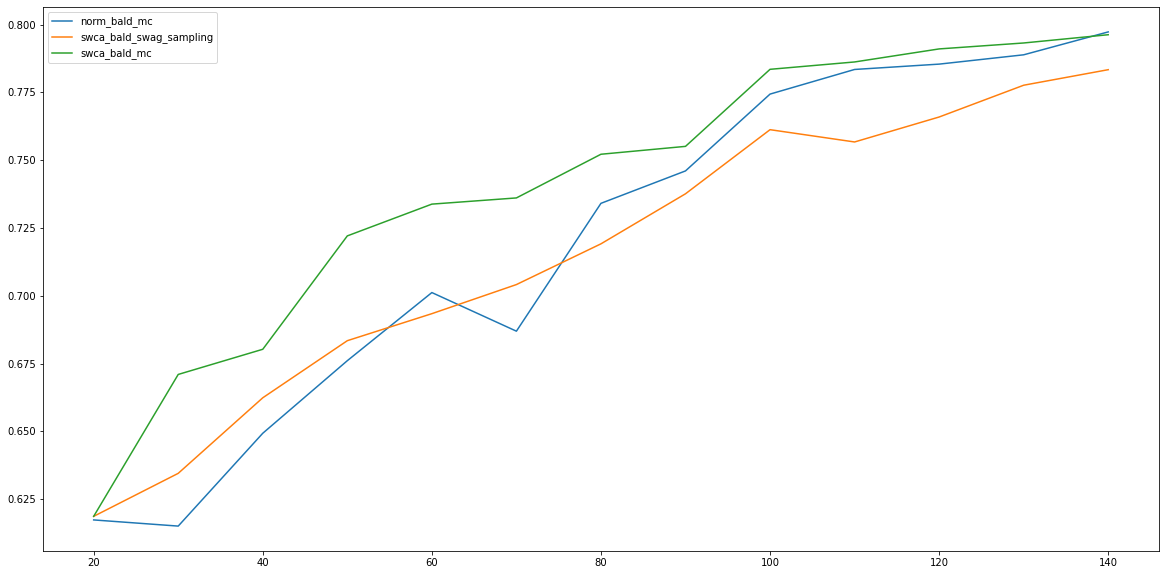

In [292]:
for k in averaged_plots:
    
    if k != 'steps':
    
        plt.plot(averaged_plots['steps'],averaged_plots[k],label=k)
        
plt.legend()

In [111]:
averaged_plots[k]

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

In [95]:
to_average = np.zeros((len(norm_bald_mc_data),len(data_show_all[norm_bald_mc_data[0]][af_][metrr])))

for j in range(len(norm_bald_mc_data)):
    
    to_average[j][:] = data_show_all[norm_bald_mc_data[j]][af_][metrr]

In [97]:
to_average.mean(axis=0)

array([0.69369587, 0.65841512, 0.61564997, 0.66456241, 0.66631289,
       0.55910049, 0.56172351, 0.60813319, 0.77762026, 0.79999206,
       0.81541968, 0.78905152, 0.81474367])

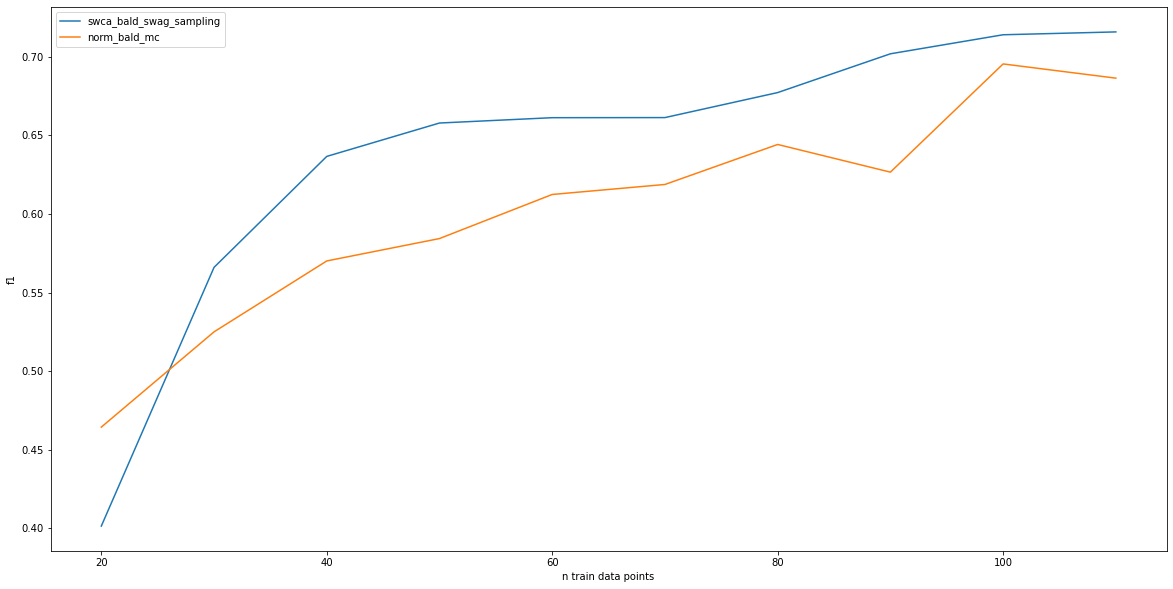

In [506]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

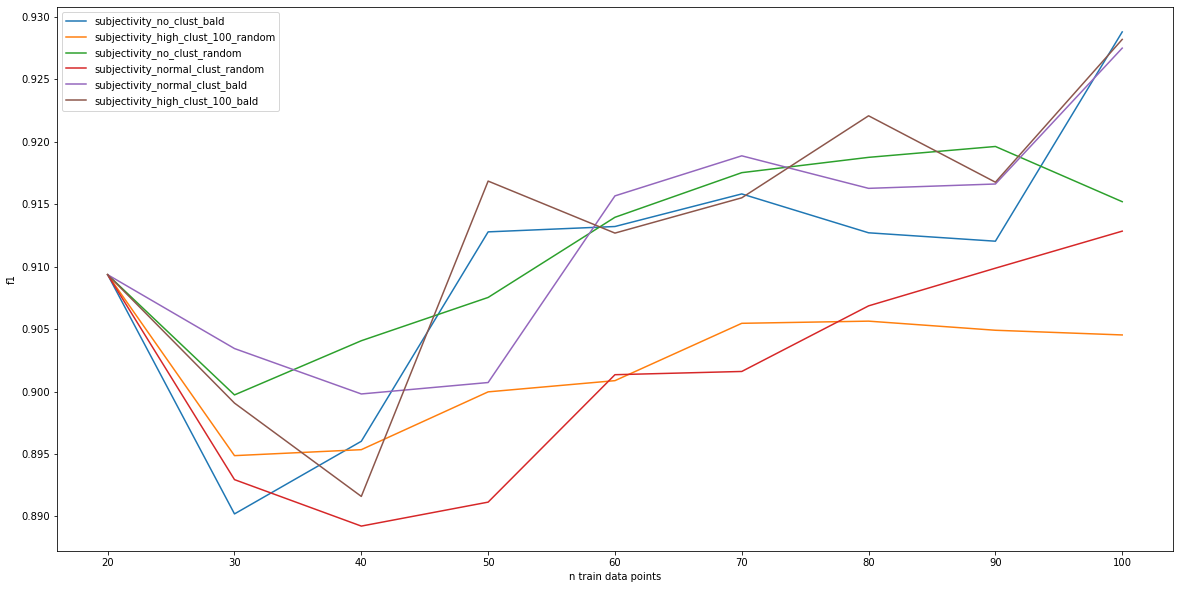

In [468]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

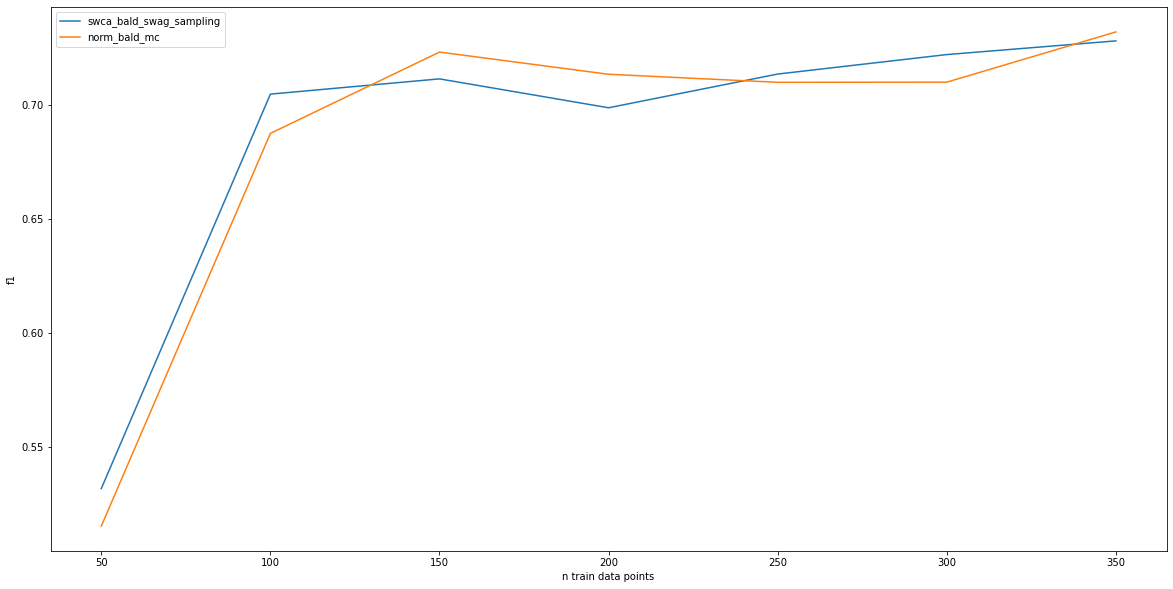

In [329]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

In [287]:
data_show_all['norm_bald_mc']['bald']['f1'][-1]

0.7321481239776816

In [288]:
data_show_all['swca_bald_swag_sampling']['bald']['f1'][-1]

0.7282142679139905

In [289]:
max(data_show_all['swca_bald_swag_sampling']['bald']['f1'])

0.7282142679139905

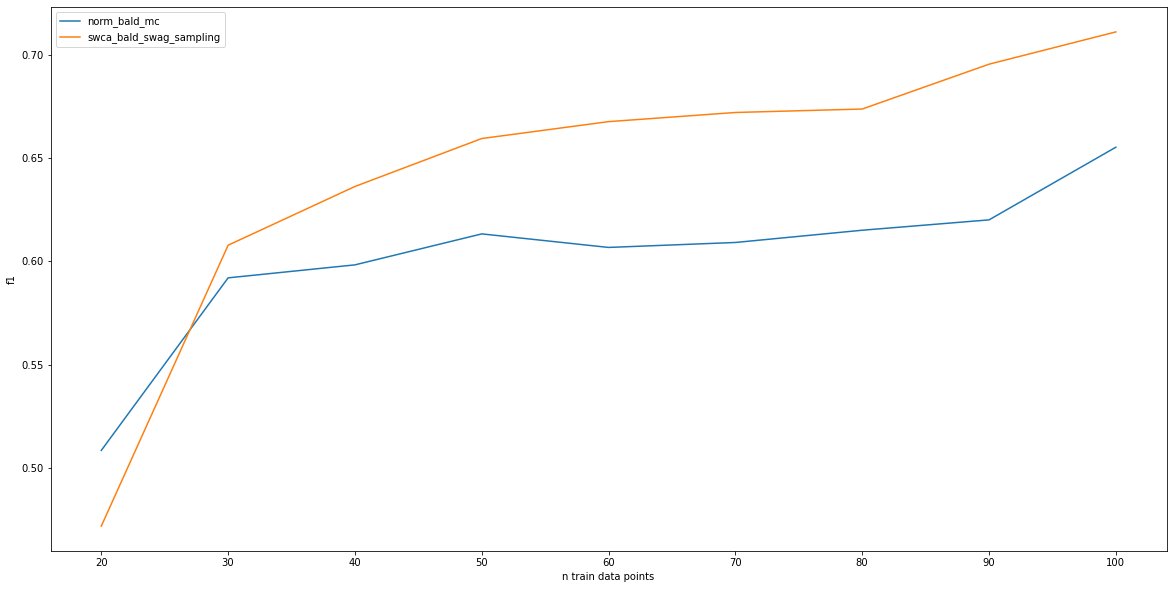

In [264]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

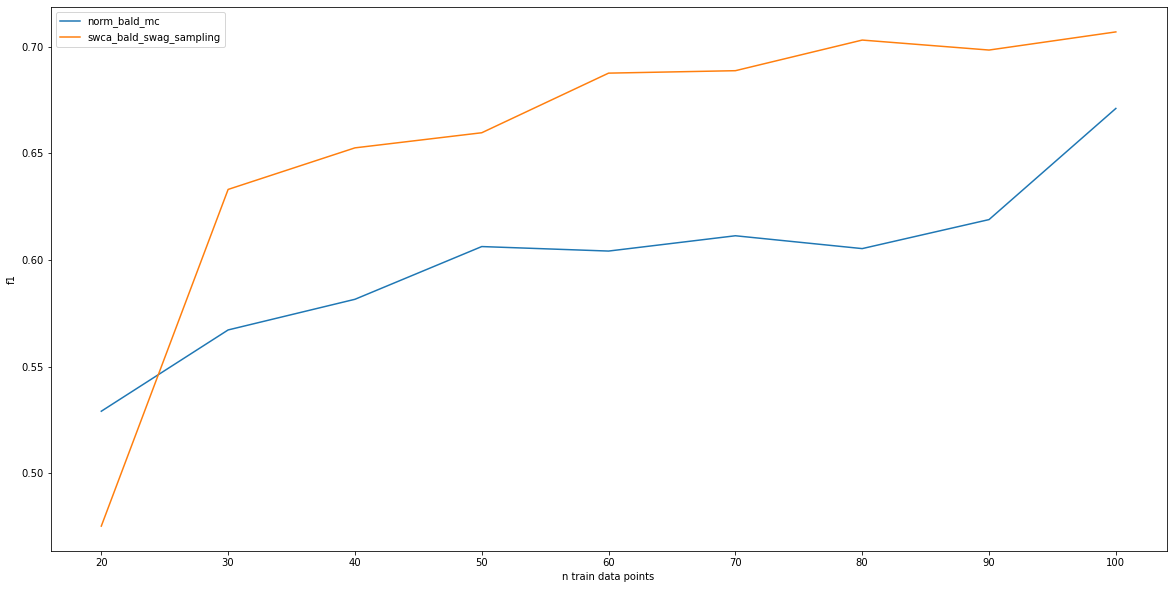

In [348]:
# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError
        
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data

for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()

In [266]:
data_show_all.keys()

dict_keys(['norm_bald_mc', 'swca_bald_swag_sampling'])

In [272]:
data_show_all['norm_bald_mc']['bald']['f1'][-1]

0.6552184819112468

In [273]:
data_show_all['swca_bald_swag_sampling']['bald']['f1'][-1]

0.7110282351959774

KeyError: 'bald'

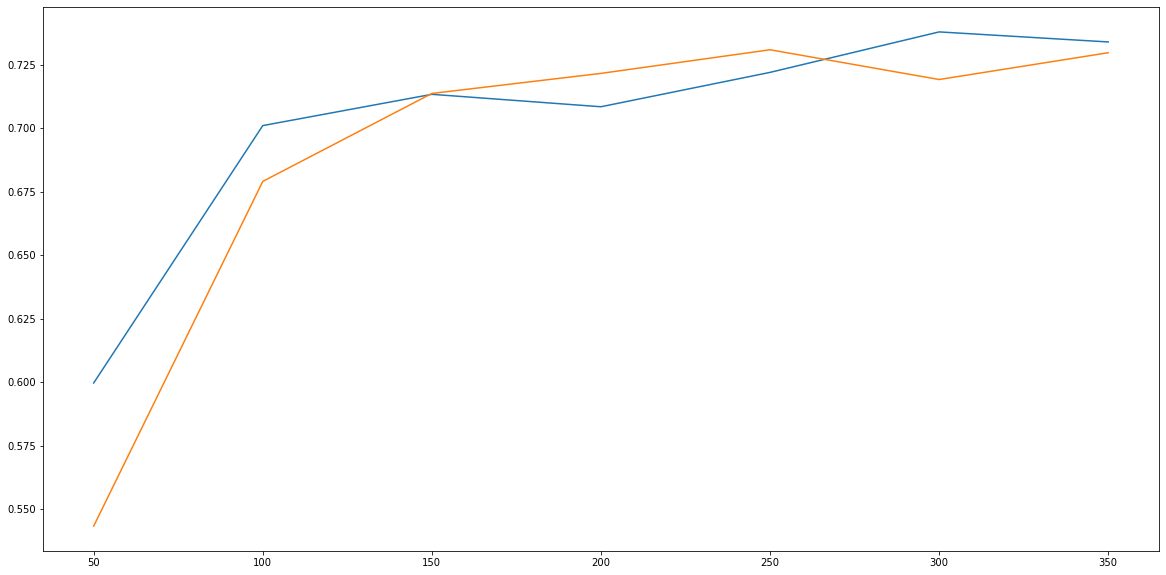

In [86]:
# filter paths
all_cola_paths  = filter_paths(keywords,main_dir)

# get names
names = [get_name(i) for i in all_cola_paths]

# strategies
strategy = []
for i in names:
    if 'bald' in i:
        strategy.append('bald')
    elif 'random' in i:
        strategy.append('random')
    elif 'var_ratios' in i:
        strategy.append('var_ratios')
    else:
        raise NotImplementedError


data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data


for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]

    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)

plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()



In [13]:


all_cola_paths

['./final_publish_paper_experiments/ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_normal_clust.json',
 './final_publish_paper_experiments/ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_high_clust.json',
 './final_publish_paper_experiments/ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_no_clust.json',
 './final_publish_paper_experiments/ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_normal_clust.json',
 './final_publish_paper_experiments/ag_news_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_random_mc_no_clust.json']

In [21]:
names = [get_name(i) for i in all_cola_paths]

In [22]:
names

['ag_news_normal_clust_random',
 'ag_news_high_clust_100_random',
 'ag_news_no_clust_bald',
 'ag_news_normal_clust_bald',
 'ag_news_no_clust_random']

In [30]:
strategy = ['bald' if 'bald' in i else 'random' for i in names]

In [10]:
all_cola_paths[0]

'./final_publish_paper_experiments/cola_ts_10_e_20_taq_50_nq_50_init_ts_50_pss_400_its_35_norm_bald_mc_no_clust.json'

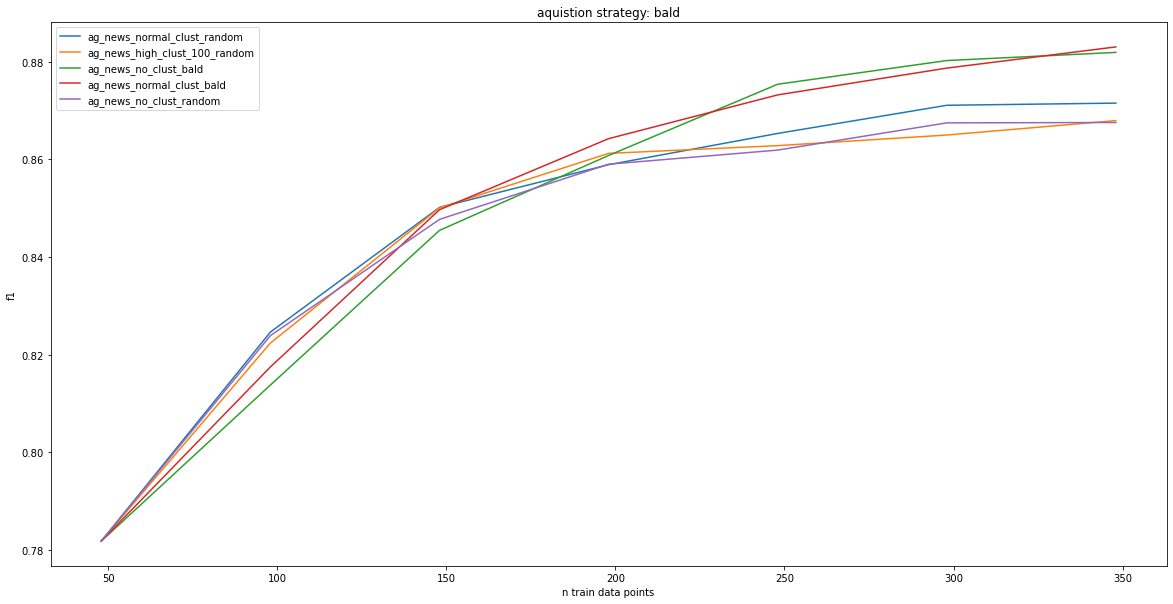

In [33]:
metr_s = 'f1'
     
data_show_all = {}

for i,j in zip(all_cola_paths,names):

    with open(i) as json_file:
        data = json.load(json_file)
        data_show_all[j] = data
        
        
for i,j in zip(data_show_all,strategy):

    data_c = data_show_all[i]
    
    try:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    except:
        plt.plot(data_c[j]['n_train'],data_c[j][metr_s],label=i)
    
plt.legend()
plt.ylabel(metr_s)
plt.xlabel('n train data points')
# plt.title('aquistion strategy: bald')
plt.show()
    

## 

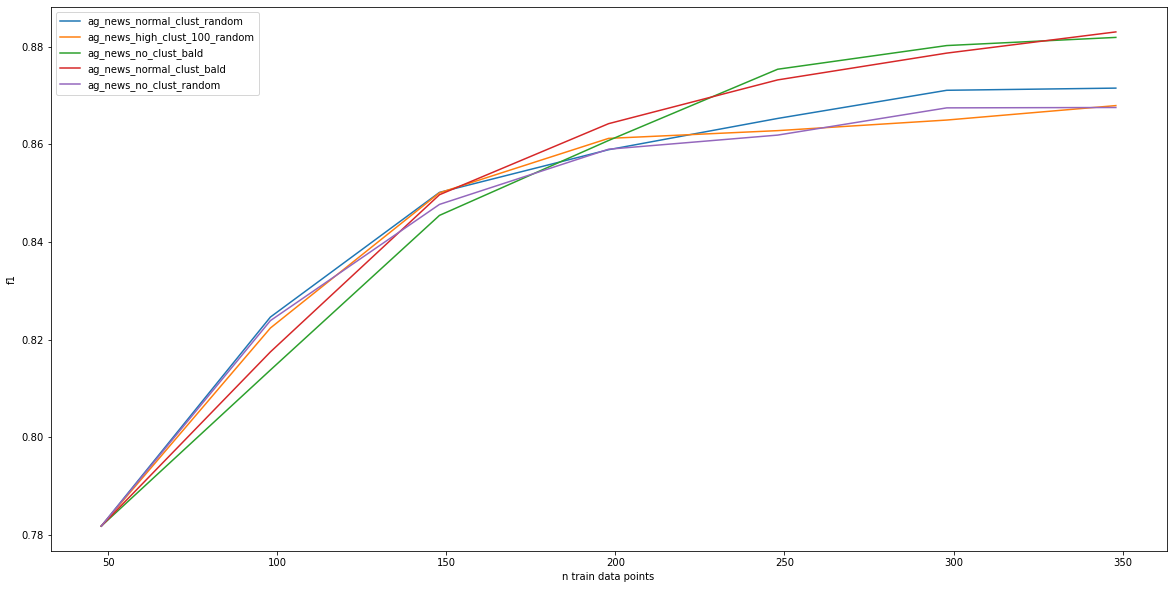